# Movie Recommender System

### Initialization


#### Import Libraries


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

#### Import Dataset

In [21]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### Missing Values

In [23]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

#### Description

In [24]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [25]:
df.duplicated().sum()

0

#### Remove Low Rated Movies

In [26]:
df = df.sort_values(by='Popularity',ascending=False).head(6000)

### Exploratory Data Analysis

#### Yearwise Analysis

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_23940\4036614677.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_23940\4036614677.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
C:\Users\Rishabh\AppData\Local\Temp\ipykernel_23940\4036614677.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

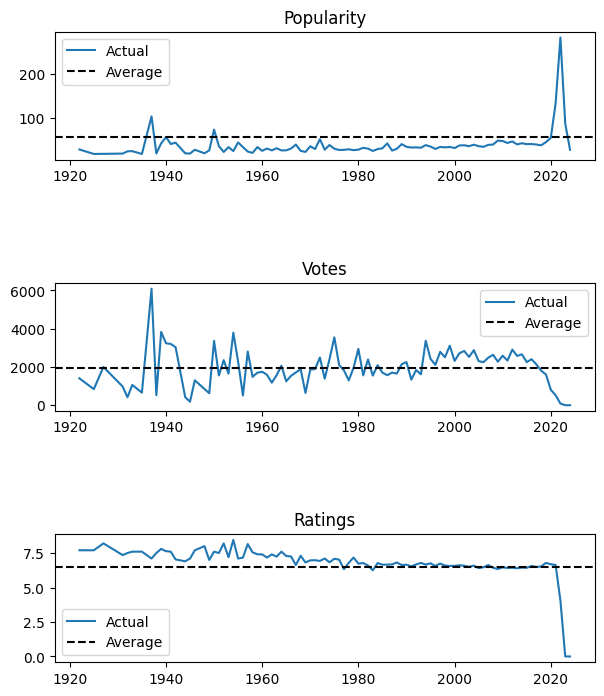

In [27]:
df['Year'] = [int(x[0:4]) for x in df['Release_Date']]
yearwise = df[['Year','Popularity','Vote_Count','Vote_Average']].groupby(['Year']).mean()
average = df[['Year','Popularity','Vote_Count','Vote_Average']].mean()

fig,ax = plt.subplots(3,1)
ax[0].plot(yearwise.index,yearwise['Popularity'],label='Actual')
ax[0].axhline(y = average[1], linestyle = '--',label='Average',c='black')
ax[0].set_title('Popularity')
ax[0].legend(loc='best')

ax[1].plot(yearwise.index,yearwise['Vote_Count'],label='Actual')
ax[1].axhline(y = average[2], linestyle = '--',label='Average',c='black')
ax[1].set_title('Votes')
ax[1].legend(loc='best')

ax[2].plot(yearwise.index,yearwise['Vote_Average'],label='Actual')
ax[2].axhline(y = average[3], linestyle = '--',label='Average',c='black')
ax[2].set_title('Ratings')
ax[2].legend(loc='best')

fig.tight_layout(pad=2.0)
fig.set_figheight(8)
plt.show()
# average

#### Genre-Wise Split

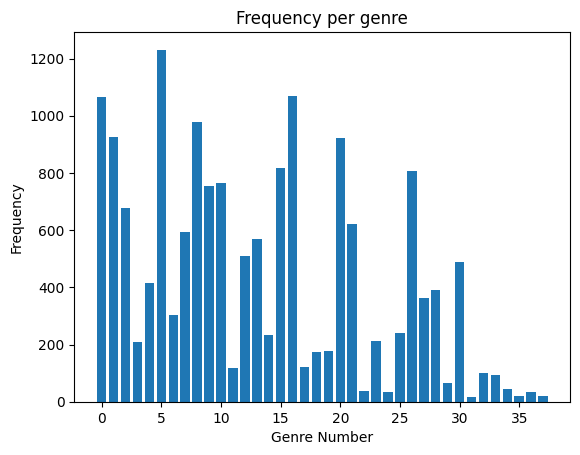

Maximum Genre and Value:  Thriller | 1231
Minimum Genre and Value: TV Movie | 16


In [28]:
genre_values = {}
value_dict = {}
def genre_fill(row):
    for genre in row.split(','):
        if genre in genre_values.keys():
            genre_values[genre]+=1
        else:
            genre_values[genre]=1

for row in df['Genre']:
    genre_fill(row)
    
plt.bar(np.arange(len(genre_values.keys())),genre_values.values())
plt.title('Frequency per genre')
plt.xlabel('Genre Number')
plt.ylabel('Frequency')
plt.show()

max_key = max(genre_values, key=genre_values.get)
min_key = min(genre_values, key=genre_values.get)
print(f"Maximum Genre and Value: {max_key} | {max(genre_values.values())}")
print(f"Minimum Genre and Value: {min_key} | {min(genre_values.values())}")

#### Heatmap

<Axes: >

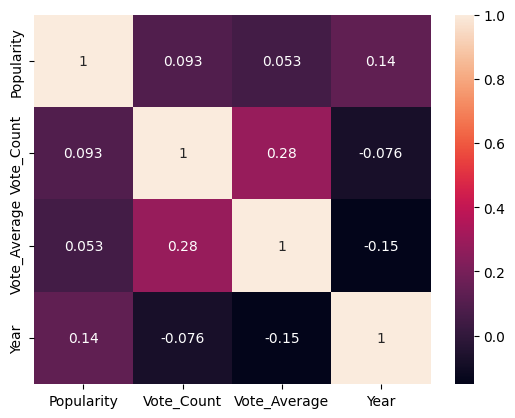

In [29]:
cols = df.describe().columns
sb.heatmap(df[cols].corr(),annot=True)

#### Pairplots

C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Rishabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When gro

[]

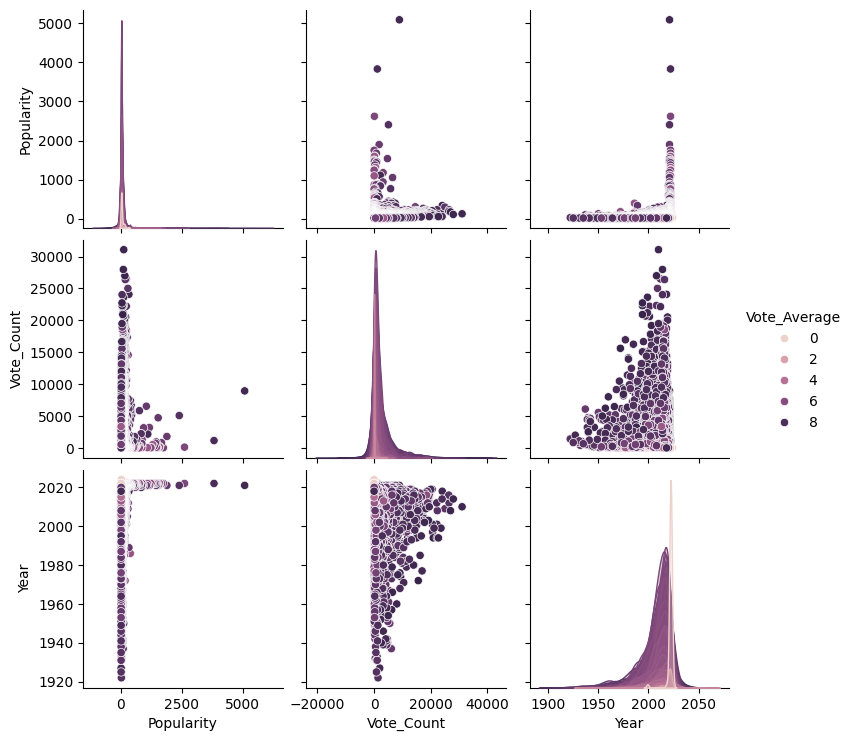

In [30]:
sb.pairplot(df,hue='Vote_Average')
plt.plot()

### Preprocessing

In [31]:
df['Overview_Stemmed'] =  df['Overview'] + " " + df['Genre'] + " " + df['Original_Language'] + df['Title'] 

#### Lowercasing

In [32]:
def lower(text):
    return text.lower()

df['Title_Lower'] = df['Title'].apply(lower)

#### Porter Stemming

In [33]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stem = PorterStemmer()
def stem_sentence(text):
    y = []
    for word in text.split(" "):
        y.append(stem.stem(word))
    return " ".join(val for val in y)   

df['Overview_Stemmed'] = df['Overview_Stemmed'].apply(stem_sentence)

#### Vectorizing

In [34]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'),max_features=10000)
numeric_overview = vectorizer.fit_transform(df['Overview_Stemmed']).toarray()
numeric_overview

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Similarity Matrix


In [35]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(numeric_overview)
similarity_matrix[0]

array([1.        , 0.00990685, 0.01541661, ..., 0.06835052, 0.01514734,
       0.05222427])

### Fetching Function

In [36]:
# python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')
def matchTitle(title):
    l = []
    for word in title.split(' '):
        if word not in stopwords.words('english'):
            l.append(word)
    title = " ".join(l).strip()
    doc = nlp(lower(title))
    l = []
    for row in df['Title']:
        l.append(nlp(row).similarity(doc))
    df['Similar'] = l
    return df.sort_values(by='Similar',ascending=False).head(6).sort_values(by='Popularity',ascending=False)
    
print(matchTitle("Star wars: The Return of Jedi"))

     Release_Date                                   Title  \
431    2012-06-20         Abraham Lincoln: Vampire Hunter   
785    2015-12-15            Star Wars: The Force Awakens   
847    2017-12-13                Star Wars: The Last Jedi   
1622   2013-07-30  Justice League: The Flashpoint Paradox   
1678   2011-04-09          Green Lantern: Emerald Knights   
3698   2019-06-20             Escape Plan: The Extractors   

                                               Overview  Popularity  \
431   President Lincoln's mother is killed by a supe...     116.620   
785   Thirty years after defeating the Galactic Empi...      77.811   
847   Rey develops her newly discovered abilities wi...      73.522   
1622  The Flash finds himself in a war-torn alternat...      47.571   
1678  As the home planet of the Green Lantern Corps ...      46.286   
3698  After security expert Ray Breslin is hired to ...      25.891   

      Vote_Count  Vote_Average Original_Language  \
431         2728      

In [37]:
def fetch(movie):
    try:
        index = df[df['Title_Lower']==movie.lower()].index[0]
    except:
        return "Not Available"
    movies = sorted(list(enumerate(similarity_matrix[index])),reverse=True,key=lambda x:x[1])[1:6]
    similar_movies = []
    for movie in movies:
        similar_movies.append(df.iloc[movie[0]])
    return pd.DataFrame(similar_movies).sort_values(by='Popularity',ascending=False).drop(['Title_Lower','Overview_Stemmed'],axis=1)
    
fetch('the one')

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year,Similar
1622,2013-07-30,Justice League: The Flashpoint Paradox,The Flash finds himself in a war-torn alternat...,47.571,1407,7.9,en,"Science Fiction, Animation, Action, Adventure",https://image.tmdb.org/t/p/original/zmpE3mfhv0...,2013,0.774016
1796,2015-07-14,Justice League: Gods and Monsters,"In an alternate universe, very different versi...",44.020,444,7.2,en,"Action, Animation, Fantasy",https://image.tmdb.org/t/p/original/9EoqQuEZKm...,2015,0.617782
2775,2010-02-23,Justice League: Crisis on Two Earths,A heroic version of Lex Luthor from an alterna...,32.023,526,7.4,en,"Action, Adventure, Animation, Science Fiction",https://image.tmdb.org/t/p/original/5Cjrxbv0BI...,2010,0.619782
4886,1993-05-28,Super Mario Bros.,"Mario and Luigi, plumbers from Brooklyn, find ...",21.272,890,4.2,en,"Adventure, Comedy, Family, Science Fiction",https://image.tmdb.org/t/p/original/cudfWiiFDx...,1993,0.547909
5684,2012-09-27,Upside Down,In an alternate universe where twinned worlds ...,19.191,2146,6.2,en,"Romance, Science Fiction, Drama, Fantasy",https://image.tmdb.org/t/p/original/2Td1nknvCc...,2012,0.305920


### Pickling

In [38]:
import pickle
f = open('dataframe.pkl','wb')
pickle.dump(df,f)
fm = open('matrix.pkl','wb')
pickle.dump(similarity_matrix,fm)
f.close()
fm.close()